<a href="https://colab.research.google.com/github/GilRtt/PCD_Kelompok9/blob/main/Image_Compression_SVD(kelompok9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


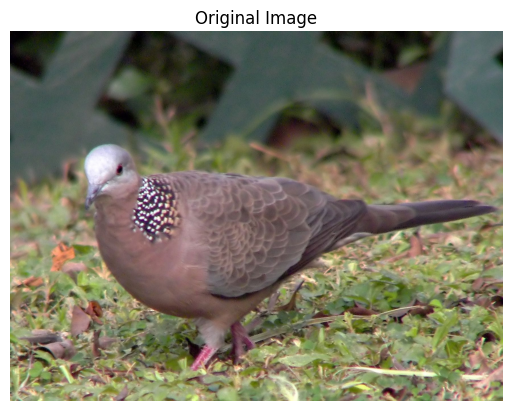

In [20]:
# Import library yang diperlukan
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path gambar asli di Google Drive, pastikan path-nya sesuai dengan struktur folder Anda
original_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/Burung.jpg'

# Memuat gambar menggunakan skimage
original_image = io.imread(original_image_path)

# Menampilkan gambar asli
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()



## Fungsi svd_compression untuk melakukan kompresi gambar berbasis SVD dengan jumlah nilai tunggal tertentu (k)

In [21]:
# Fungsi untuk kompresi menggunakan Singular Value Decomposition (SVD)
def svd_compression(original_image, k):
    # Mengonversi gambar ke bentuk array numpy jika belum
    original_array = np.asarray(original_image)

    # Memeriksa apakah gambar berwarna atau grayscale
    is_color_image = len(original_array.shape) == 3 and original_array.shape[2] == 3

    if is_color_image:
        # Jika gambar berwarna, lakukan SVD terpisah untuk setiap saluran warna
        compressed_image_array = np.zeros_like(original_array)
        for i in range(3):
            U, S, Vt = np.linalg.svd(original_array[:, :, i], full_matrices=False)
            U_k = U[:, :k]
            S_k = np.diag(S[:k])
            Vt_k = Vt[:k, :]
            compressed_image_array[:, :, i] = np.dot(U_k, np.dot(S_k, Vt_k))
    else:
        # Jika gambar grayscale, lakukan SVD pada gambar keseluruhan
        U, S, Vt = np.linalg.svd(original_array, full_matrices=False)
        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        Vt_k = Vt[:k, :]
        compressed_image_array = np.dot(U_k, np.dot(S_k, Vt_k))

    # Pastikan nilai piksel berada dalam rentang yang valid (0 hingga 255)
    compressed_image_array = np.clip(compressed_image_array, 0, 255).astype(np.uint8)

    return compressed_image_array

## Kami menentukan nilai untuk k (jumlah nilai tunggal yang harus disimpan) dan menerapkan fungsi kompresi SVD untuk mendapatkan gambar terkompresi, yang kemudian ditampilkan.

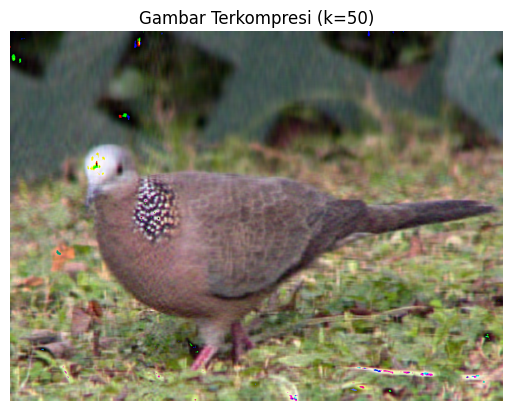

In [22]:
# Menentukan nilai 'k' untuk kompresi (Anda dapat bereksperimen dengan nilai yang berbeda)
k = 50

# Melakukan kompresi menggunakan Singular Value Decomposition (SVD)
compressed_image = svd_compression(original_image, k)

# Menampilkan gambar yang telah terkompresi
plt.imshow(compressed_image)
plt.title(f'Gambar Terkompresi (k={k})')
plt.axis('off')
plt.show()


## Menampilkan gambar asli dan terkompresi berdampingan menggunakan subplot

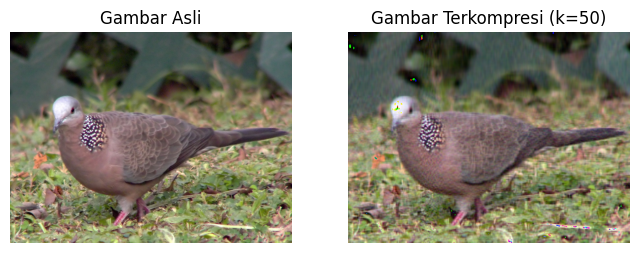

In [23]:
# Menampilkan kedua gambar asli dan gambar terkompresi secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Menampilkan gambar asli
axes[0].imshow(original_image)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

# Menampilkan gambar terkompresi
axes[1].imshow(compressed_image)
axes[1].set_title(f'Gambar Terkompresi (k={k})')
axes[1].axis('off')

plt.show()

## Fungsi svd_compression_color untuk melakukan kompresi berbasis SVD untuk gambar skala abu-abu dan warna

In [24]:
# Mendefinisikan fungsi untuk kompresi SVD pada gambar berwarna
def svd_compression_color(image, k):
    if image.ndim == 2:
        # Jika gambar grayscale
        U, S, Vt = np.linalg.svd(image, full_matrices=False)
        compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    elif image.ndim == 3:
        # Jika gambar RGB
        compressed_channels = []
        for channel in range(image.shape[2]):
            U, S, Vt = np.linalg.svd(image[:, :, channel], full_matrices=False)
            compressed_channel = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
            compressed_channels.append(compressed_channel)
        compressed_image = np.stack(compressed_channels, axis=-1)
    else:
        # Format gambar tidak didukung
        raise ValueError("Format gambar tidak didukung")

    return compressed_image


## Daftar gambar sampel dari skimage.data, dan untuk setiap gambar, kami menampilkan gambar asli dan terkompresi menggunakan fungsi svd_compression_color

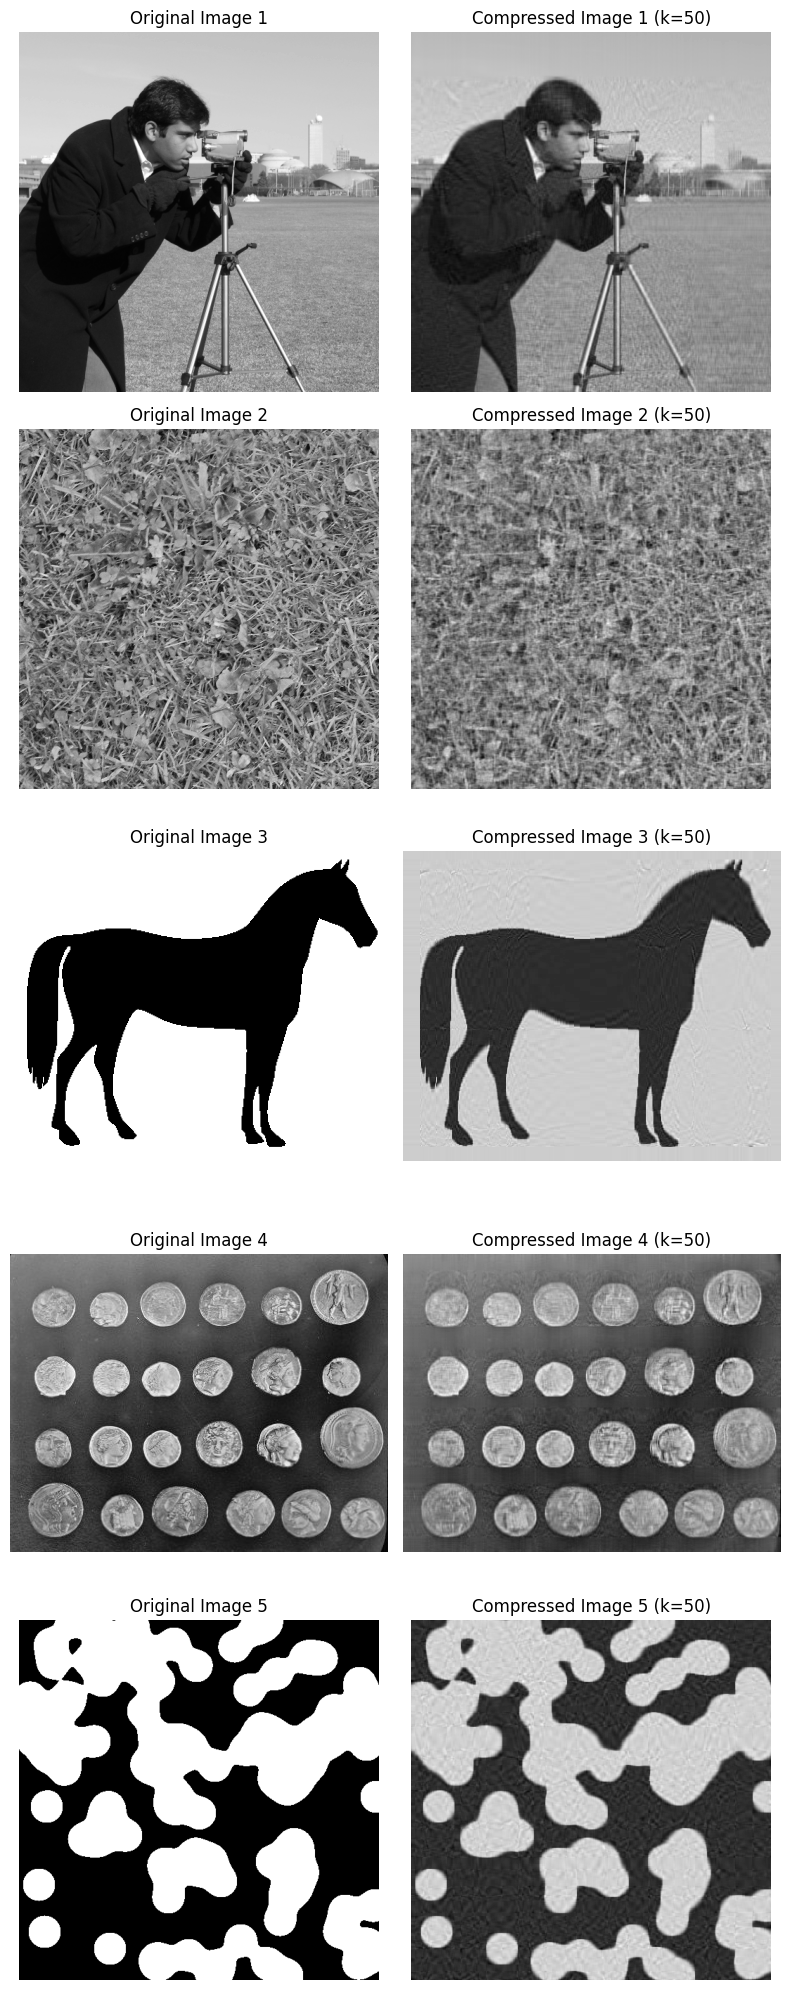

In [25]:
from skimage import data

# Create a list of sample images from skimage
image_list = [data.camera(), data.grass(), data.horse(), data.coins(), data.binary_blobs()]

# Create a subplot grid for displaying images
fig, axes = plt.subplots(len(image_list), 2, figsize=(8, 4*len(image_list)))

# Display original and compressed images for each sample image
for idx, original_image in enumerate(image_list):
    # Display the original image
    axes[idx, 0].imshow(original_image, cmap='gray')
    axes[idx, 0].set_title(f'Original Image {idx+1}')
    axes[idx, 0].axis('off')

    # Display the compressed image
    compressed_image = svd_compression_color(original_image, k)
    axes[idx, 1].imshow(compressed_image, cmap='gray')
    axes[idx, 1].set_title(f'Compressed Image {idx+1} (k={k})')
    axes[idx, 1].axis('off')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()
